In [209]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
import os, sys
import PIL
from scipy import ndimage
from scipy.optimize import curve_fit, minimize, fmin_powell


%matplotlib inline

In [212]:
def in_ellipse(xs_, params):
    xs = xs_[:,0]
    ys = xs_[:,1]
    xs_s = xs - params[0]
    ys_s = ys - params[1]
    a = (np.cos(params[4]) * xs_s + np.sin(params[4]) * ys_s)**2 / params[2]**2
    b = (np.sin(params[4]) * xs_s - np.cos(params[4]) * ys_s)**2 / params[3]**2
    return (a + b <= 1) * 1

def fit_ellipse(img):
    img = (img > 0) * 1
    print(img.max())
    xsiz, ysiz = img.shape
    params = [xsiz/2, ysiz/2, xsiz, ysiz, 0]
    xs = np.dstack(np.meshgrid(range(xsiz), range(ysiz), indexing='ij')).reshape((-1,2))
    print(xs)
    return minimize(lambda x : np.sum((img.ravel() - in_ellipse(xs, x))**2), params, method='Powell')
    

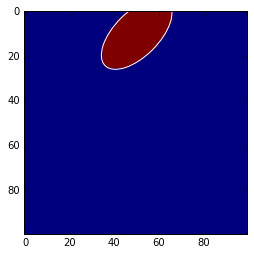

1
[[  0   0]
 [  0   1]
 [  0   2]
 ..., 
 [ 49 132]
 [ 49 133]
 [ 49 134]]
   direc: array([[ 1.219371  , -0.37043654, -5.43550974, -3.08722901, -0.13839018],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [-0.39490747, -0.39490747, -0.39490747, -0.39490747, -0.12881618],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [-0.21070003, -0.05813825, -1.02973892, -0.26050807, -0.02233201]])
     fun: 824
 message: 'Optimization terminated successfully.'
    nfev: 1533
     nit: 13
  status: 0
 success: True
       x: array([  24.25434025,   67.83322755,   30.98533929,  132.60856208,
          0.28212331])
1
[[  0   0]
 [  0   1]
 [  0   2]
 ..., 
 [ 49 132]
 [ 49 133]
 [ 49 134]]
1
[[  0   0]
 [  0   1]
 [  0   2]
 ..., 
 [195  69]
 [195  70]
 [195  71]]
   direc: array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00,   0.0000000

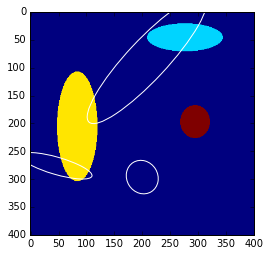

In [214]:
xsiz = 100
ysiz = 100

xc = 10
yc = 50
a = 10
b = 20
rot = np.pi/4

xs = np.dstack(np.meshgrid(range(xsiz), range(ysiz), indexing='ij')).reshape((-1,2))

res = in_ellipse(xs, [xc, yc, a, b, rot]).reshape(100,100)



fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.imshow(res)


ax.add_patch(Ellipse([yc, xc], a*2, b*2, 45, fill=False, color='white'))

plt.show()
os.getcwd()


pimg = PIL.Image.open('/Users/david/Desktop/ell.tif')
img = np.array(pimg.getdata(), np.uint8).reshape((400, 400))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

img2 = ndimage.label(img)[0]
plt.imshow(img2)
objs = ndimage.measurements.find_objects(img2)

for o in objs:
    imgtofit = img2[o]
    print(fit_ellipse(np.array(imgtofit, np.float)))
    params = fit_ellipse(np.array(imgtofit, np.float)).x
    x1 = params[1] + o[1].start
    y1 = params[0] + o[0].start
    ax.add_patch(Ellipse([y1, x1], params[3], params[2], params[4] / np.pi * 180, fill=False, color='white'))

In [130]:
np.dstack(np.meshgrid(range(xsiz), range(ysiz), indexing='ij')).reshape((-1,2))[:,0]

array([ 0,  0,  0, ..., 99, 99, 99])